In [95]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [96]:
documents = ['我是一個來自水星的原住民，水星上面有很多闢利閃電無敵可愛的水母水中游來游去']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/一個/來/自/水星/的/原住民/，/水星/上面/有/很多/闢利閃電無敵可愛/的/水母/水中/游來游去


In [97]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/一個/來/自/水星/的/原住民/，/水星/上面/有/很多/闢利閃電無敵可愛/的/水母/水中/游來游去


In [98]:
orgdata = pd.read_csv('我想睡覺了.csv')

In [99]:
orgdata.head()

,Unnamed: 0,日期,案號,內文,法規,法官,裁判類型,案由
0,0,20021129,"91,易,2943",臺灣臺中地方法院刑事判決 九十一年度易字第二九四三號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",洪俊誠,刑事判決,違反槍砲彈藥刀械管制條例
1,1,20000808-279568d4-5d44-4f67-9053-41d33d651f5e,"89,上易,1059",臺灣高等法院高雄分院刑事判決 八十九年度上易字第一五九號\n 上 訴 人...,"['刑事訴訟法第368條', '刑事訴訟法第301條第1項', '刑事訴訟法第154條']",莊秋桃,刑事判決,違反槍彈藥刀械管制條例
2,2,20030603,"92,易,1296",臺灣臺中地方法院刑事判決 九十二年度易字第一二九六號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",陳如玲,刑事判決,違反槍砲彈藥刀械管制條例
3,3,20190507,"108,單禁沒,54",臺灣彰化地方法院刑事裁定 108年度單禁沒字第54號\n聲 請 人 臺灣彰化地方檢...,"['中華民國刑法第38條第1項', '中華民國刑法第40條第2項', '刑事訴訟法第455條...",巫美蕙,刑事裁定,聲請裁定沒收違禁物
4,4,20030116,"91,易,901",臺灣彰化地方法院刑事判決 九十一年度易字第九一號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第300條...",余仕明,刑事判決,違反槍砲彈藥刀械管制條例


In [100]:
orgdata['seg'] = ""
orgdata.head()

,Unnamed: 0,日期,案號,內文,法規,法官,裁判類型,案由,seg
0,0,20021129,"91,易,2943",臺灣臺中地方法院刑事判決 九十一年度易字第二九四三號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",洪俊誠,刑事判決,違反槍砲彈藥刀械管制條例,
1,1,20000808-279568d4-5d44-4f67-9053-41d33d651f5e,"89,上易,1059",臺灣高等法院高雄分院刑事判決 八十九年度上易字第一五九號\n 上 訴 人...,"['刑事訴訟法第368條', '刑事訴訟法第301條第1項', '刑事訴訟法第154條']",莊秋桃,刑事判決,違反槍彈藥刀械管制條例,
2,2,20030603,"92,易,1296",臺灣臺中地方法院刑事判決 九十二年度易字第一二九六號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",陳如玲,刑事判決,違反槍砲彈藥刀械管制條例,
3,3,20190507,"108,單禁沒,54",臺灣彰化地方法院刑事裁定 108年度單禁沒字第54號\n聲 請 人 臺灣彰化地方檢...,"['中華民國刑法第38條第1項', '中華民國刑法第40條第2項', '刑事訴訟法第455條...",巫美蕙,刑事裁定,聲請裁定沒收違禁物,
4,4,20030116,"91,易,901",臺灣彰化地方法院刑事判決 九十一年度易字第九一號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第300條...",余仕明,刑事判決,違反槍砲彈藥刀械管制條例,


In [101]:
jieba.analyse.set_stop_words('noward.txt')
index = 0
for documents in orgdata['內文']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\USER\AppData\Local\Temp\ipykernel_26072\2552411206.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
orgdata['seg']

0     [刀械, 彈藥, 條例, 管制, 未經許, 攜帶, 被告, 機關, 手指, 地方法院, 九十...
1     [刀械, 條例, 彈藥, 管制, 被告, 鑑驗, 匕首, 認定, 上訴, 八十九年, 第三款...
2     [刀械, 彈藥, 武士刀, 條例, 攜帶, 被告, 未經許, 管制, 機關, 垃圾袋, 判決...
3     [刀械, 彈藥, 條例, 管制, 武士刀, 沒收, 鑑驗, 條第, 禁物, 108, 107...
4     [刀械, 彈藥, 彰化, 條例, 判決, 手指, 未經許, 攜帶, 被告, 管制, 場所, ...
                            ...                        
65    [刀械, 彈藥, 原告, 條例, 管制, 被告, 規定, 機關, 條之, 確定, 有期徒刑,...
66    [刀械, 彈藥, 條例, 管制, 沒收, 條第, 禁物, 武士刀, 鑑驗, 108, 彰化,...
67    [刀械, 彈藥, 條例, 管制, 沒收, 禁物, 武士刀, 鑑驗, 條第, 107, 彰化,...
68    [刀械, 彈藥, 條例, 107, 管制, 沒收, 禁物, 武士刀, 鑑驗, 條第, 裁定,...
69    [刀械, 管制, 條例, 彈藥, 扣案, 被告, 本件, 95, 認定, 提要, 高雄市, ...
Name: seg, Length: 70, dtype: object

In [103]:
date_split = orgdata['日期'].iloc[0].split('.')

In [104]:
date_split[0]

'20021129'

In [105]:
orgdata['year'] = ""
index = 0
for documents in orgdata['日期']:
    date_split = documents.split('.')
    orgdata['year'].iloc[index] = date_split[0]
    index += 1

C:\Users\USER\AppData\Local\Temp\ipykernel_26072\2116072331.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
orgdata.head()

,Unnamed: 0,日期,案號,內文,法規,法官,裁判類型,案由,seg,year
0,0,20021129,"91,易,2943",臺灣臺中地方法院刑事判決 九十一年度易字第二九四三號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",洪俊誠,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 條例, 管制, 未經許, 攜帶, 被告, 機關, 手指, 地方法院, 九十...",20021129
1,1,20000808-279568d4-5d44-4f67-9053-41d33d651f5e,"89,上易,1059",臺灣高等法院高雄分院刑事判決 八十九年度上易字第一五九號\n 上 訴 人...,"['刑事訴訟法第368條', '刑事訴訟法第301條第1項', '刑事訴訟法第154條']",莊秋桃,刑事判決,違反槍彈藥刀械管制條例,"[刀械, 條例, 彈藥, 管制, 被告, 鑑驗, 匕首, 認定, 上訴, 八十九年, 第三款...",20000808-279568d4-5d44-4f67-9053-41d33d651f5e
2,2,20030603,"92,易,1296",臺灣臺中地方法院刑事判決 九十二年度易字第一二九六號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",陳如玲,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 武士刀, 條例, 攜帶, 被告, 未經許, 管制, 機關, 垃圾袋, 判決...",20030603
3,3,20190507,"108,單禁沒,54",臺灣彰化地方法院刑事裁定 108年度單禁沒字第54號\n聲 請 人 臺灣彰化地方檢...,"['中華民國刑法第38條第1項', '中華民國刑法第40條第2項', '刑事訴訟法第455條...",巫美蕙,刑事裁定,聲請裁定沒收違禁物,"[刀械, 彈藥, 條例, 管制, 武士刀, 沒收, 鑑驗, 條第, 禁物, 108, 107...",20190507
4,4,20030116,"91,易,901",臺灣彰化地方法院刑事判決 九十一年度易字第九一號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第300條...",余仕明,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 彰化, 條例, 判決, 手指, 未經許, 攜帶, 被告, 管制, 場所, ...",20030116


In [107]:
orgdata.to_csv("我累了.csv", index=False)

In [108]:
Counter(orgdata['year']).keys()

dict_keys(['20021129', '20000808-279568d4-5d44-4f67-9053-41d33d651f5e', '20030603', '20190507', '20030116', '20100531', '20190227', '20190111', '20181126', '20070515'])

In [109]:
words = list(orgdata['案由'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [110]:
df = [show_key, show_values]

In [111]:
result = pd.concat(df, axis=1)
result.columns = ['案由', '次數']
result

,案由,次數
0,違反槍砲彈藥刀械管制條例,28
1,違反槍彈藥刀械管制條例,7
2,聲請裁定沒收違禁物,21
3,槍砲彈藥刀械管制條例,7
4,沒收違禁物,7


In [112]:
#違反槍砲彈藥刀械管制條例=違反槍彈藥刀械管制條例=槍砲彈藥刀械管制條例 所以總共56件

In [113]:
import plotly.express as px
import pandas as pd

px.bar(result, x='案由', y='次數', title='judge term from 85 to 109')

In [114]:
show_sub = orgdata['案由']=='違反槍砲彈藥刀械管制條例'
subdata = orgdata[show_sub]
subdata

,Unnamed: 0,日期,案號,內文,法規,法官,裁判類型,案由,seg,year
0,0,20021129,"91,易,2943",臺灣臺中地方法院刑事判決 九十一年度易字第二九四三號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",洪俊誠,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 條例, 管制, 未經許, 攜帶, 被告, 機關, 手指, 地方法院, 九十...",20021129
2,2,20030603,"92,易,1296",臺灣臺中地方法院刑事判決 九十二年度易字第一二九六號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",陳如玲,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 武士刀, 條例, 攜帶, 被告, 未經許, 管制, 機關, 垃圾袋, 判決...",20030603
4,4,20030116,"91,易,901",臺灣彰化地方法院刑事判決 九十一年度易字第九一號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第300條...",余仕明,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 彰化, 條例, 判決, 手指, 未經許, 攜帶, 被告, 管制, 場所, ...",20030116
9,9,20070515,"96,上訴,501",臺灣高等法院高雄分院刑事判決 96年度上訴字第501號\n上 訴 人 臺灣高雄地方法...,"['刑事訴訟法第154條第2項', '刑事訴訟法第368條', '刑事訴訟法第301條第1項']",莊飛宗,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 管制, 條例, 彈藥, 扣案, 被告, 本件, 95, 認定, 提要, 高雄市, ...",20070515
10,10,20021129,"91,易,2943",臺灣臺中地方法院刑事判決 九十一年度易字第二九四三號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",洪俊誠,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 條例, 管制, 未經許, 攜帶, 被告, 機關, 手指, 地方法院, 九十...",20021129
12,12,20030603,"92,易,1296",臺灣臺中地方法院刑事判決 九十二年度易字第一二九六號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",陳如玲,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 武士刀, 條例, 攜帶, 被告, 未經許, 管制, 機關, 垃圾袋, 判決...",20030603
14,14,20030116,"91,易,901",臺灣彰化地方法院刑事判決 九十一年度易字第九一號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第300條...",余仕明,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 彰化, 條例, 判決, 手指, 未經許, 攜帶, 被告, 管制, 場所, ...",20030116
19,19,20070515,"96,上訴,501",臺灣高等法院高雄分院刑事判決 96年度上訴字第501號\n上 訴 人 臺灣高雄地方法...,"['刑事訴訟法第154條第2項', '刑事訴訟法第368條', '刑事訴訟法第301條第1項']",莊飛宗,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 管制, 條例, 彈藥, 扣案, 被告, 本件, 95, 認定, 提要, 高雄市, ...",20070515
20,20,20021129,"91,易,2943",臺灣臺中地方法院刑事判決 九十一年度易字第二九四三號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",洪俊誠,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 條例, 管制, 未經許, 攜帶, 被告, 機關, 手指, 地方法院, 九十...",20021129
22,22,20030603,"92,易,1296",臺灣臺中地方法院刑事判決 九十二年度易字第一二九六號\n 公 訴 人...,"['中華民國刑法第38條第1項第1款', '中華民國刑法第11條', '刑事訴訟法第299條...",陳如玲,刑事判決,違反槍砲彈藥刀械管制條例,"[刀械, 彈藥, 武士刀, 條例, 攜帶, 被告, 未經許, 管制, 機關, 垃圾袋, 判決...",20030603


In [115]:
type(subdata['seg'])

pandas.core.series.Series

In [116]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [117]:
subdata_seg_list

[['刀械',
  '彈藥',
  '條例',
  '管制',
  '未經許',
  '攜帶',
  '被告',
  '機關',
  '手指',
  '地方法院',
  '九十一',
  '判決',
  '中縣',
  '其刑',
  '有期徒刑',
  '供述',
  '持有',
  '第一款',
  '檢察署',
  '夜間',
  '場所',
  '傷力',
  '組成',
  '第二款',
  '以下',
  '第一',
  '前段',
  '犯罪',
  '主管',
  '公共',
  '公告',
  '第四',
  '列管',
  '刑事',
  '免除',
  '主文',
  '檢察官',
  '公訴',
  '科罰',
  '扣案',
  '沒收',
  '大里市',
  '屬槍',
  '所規定',
  '並隨身',
  '查獲',
  '偵查',
  '此有',
  '上訴',
  '前項',
  '3860',
  '販賣',
  '台幣',
  '意圖',
  '萬元',
  '罰金',
  '之者',
  '犯本',
  '減輕',
  '之來源',
  '尚佳',
  '第三款',
  '一只',
  '本院',
  '危害',
  '所犯',
  '警察局',
  '第十五',
  '二十九',
  '自首',
  '情形',
  '各式',
  '因而',
  '之罪',
  '去向',
  '零件',
  '第二',
  '治安',
  '及其',
  '二十',
  '十一年',
  '十一月',
  '中央',
  '全部',
  '加重',
  '知易',
  '二百九十九',
  '具有',
  '九一',
  '第四十一',
  '未遂犯',
  '年度',
  '科刑',
  '不在此限',
  '九四',
  '刑案',
  '禁物',
  '第三十八',
  '易字',
  '三號',
  '右列',
  '因違',
  '反槍',
  '經檢察官',
  '偵字',
  '二號',
  '如易',
  '參佰元',
  '壹日',
  '二一五',
  '號光',
  '榮工業',
  '申請',
  '之泰國籍',
  '未經',
  '許可',
  '民國',
  '附設',
  '之衣櫃',
  '發現',


In [118]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [119]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [122]:
import numpy as np
mask = np.array(Image.open("criminal.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [123]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

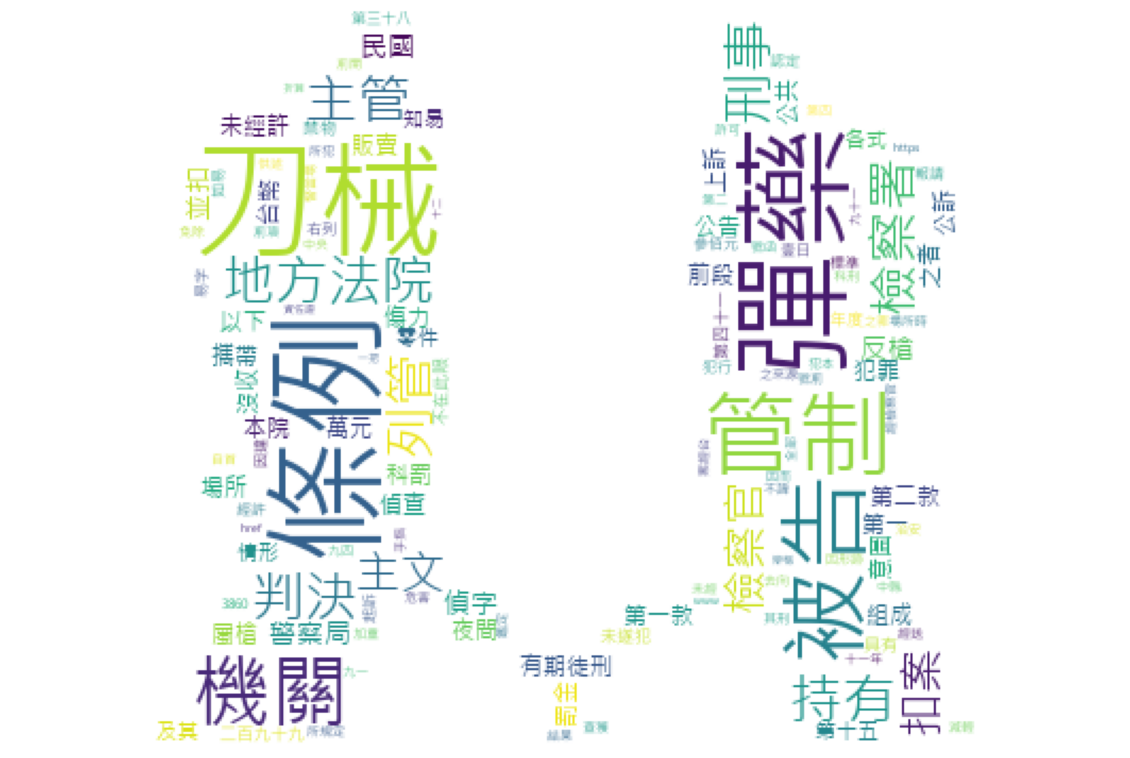

In [124]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()